In [18]:
%matplotlib inline

In [19]:
import os
import time
import math
import numpy as np
from scipy import signal
import pandas as pd
import seaborn as sb
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools as it
import random

In [50]:
def corl_old(s1, s2, time_window):
    sig1=pd.Series(s1)
    sig2=pd.Series(s2)
    #max time shift of signal is time_window-1, if shift equal to time_window, all signal will be droped.
    corrmat=np.zeros(shape=time_window-1, dtype=np.float64)
    print("single1 is", s1)
    for t in list(range(time_window-1)):
        #fill_value argument is introduced in pandas 0.24.0
        #corrmat[t]=sig1.corr(sig2.shift(periods=-t, fill_value=0.), method="pearson")
        corrmat[t]=sig1.corr(sig2.shift(periods=-t).fillna(0.), method="pearson")
        print("delay time=", t, "corr=", corrmat[t])
        print("single2 is", sig2.shift(periods=-t).fillna(0.))
        max_value=np.amax(corrmat)
        max_index=np.where(corrmat==max_value)[0]
        
    return max_index, max_value

def corl(s1, s2):
    corrmat = signal.correlate(s1, s2, mode='full') / (np.linalg.norm(s1)*np.linalg.norm(s2))
    #print(corrmat)
    max_value=np.amax(corrmat)
    max_index=np.where(corrmat==max_value)[0]
    return max_index, max_value

def corl_dumy(s1, s2):
    #print("This is a dumy function.")
    pass
    return None, 0.

In [139]:
def plot_group_spike(data, index, cols, gid):
    N = data.shape[0]
    rows = int(math.ceil(N / cols))
    width=cols*5
    heigh=rows*5
    
    fig = plt.figure(figsize=(cols*5, rows*5), facecolor='w')
    gs = gridspec.GridSpec(rows, cols)
    for i in range(N):
        df=pd.Series(data[i,:])    
        ax = fig.add_subplot(gs[i])
        ax.plot(df.index, df)
        ax.axis('off')
        ax.set_title("Spike "+str(i), fontsize=18)
        ax.text(0.6, 0.85, "t="+str(index[i]), fontsize=18, transform = ax.transAxes)
        ax.axhline(0.0, linestyle=':', color='r')
        ax.axvline((df.index.size-1)/2, linestyle=':', color='r')

    fig.suptitle("Group "+str(gid), fontsize=20)

    return

In [81]:
with h5py.File("../output/7_sigma.h5", "r") as f:
    print(list(f.keys()))
    d=f["Spike_index"][:]
    sd=f["Spike_Data"][:].astype(np.int32)
    print(d.dtype)
    print(sd.dtype)
    #print(d[0:5])
    print(pd.Series(sd[1,:]).index.size)

['Spike_Data', 'Spike_Group', 'Spike_index']
int64
int32
101


Text(0.5,0.89,'All Spike')

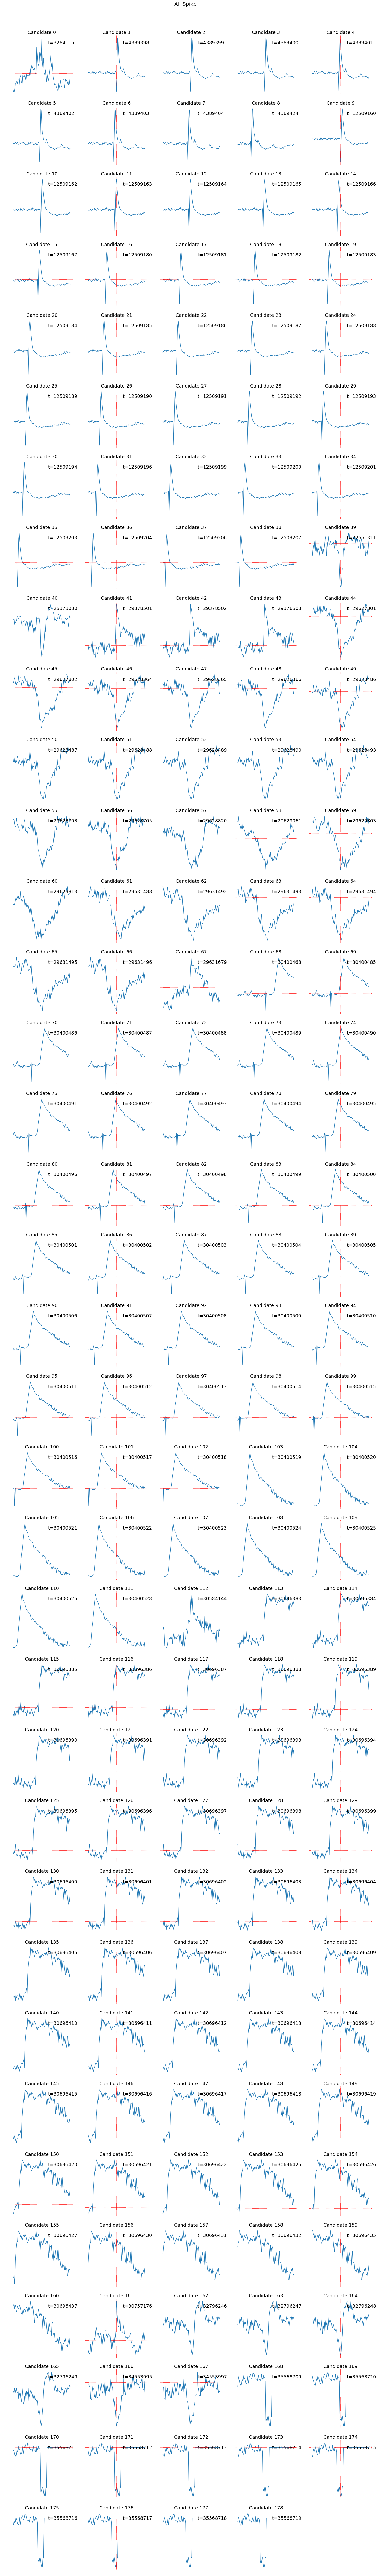

In [133]:
N = sd.shape[0]
cols = 5
rows = int(math.ceil(N / cols))
#print(N, cols, rows)

fig = plt.figure(figsize=(cols*5, rows*5), facecolor='w')

gs = gridspec.GridSpec(rows, cols)
for i in range(N):
    df=pd.Series(sd[i,:])    
    ax = fig.add_subplot(gs[i])
    ax.plot(df.index, df)
    ax.axis('off')
    ax.set_title("Candidate "+str(i), fontsize=18)
    ax.text(0.6, 0.85, "t="+str(d[i]), fontsize=18, transform = ax.transAxes)
    ax.axhline(0.0, linestyle=':', color='r')
    ax.axvline((df.index.size-1)/2, linestyle=':', color='r')

fig.suptitle("All Spike", y=0.89, fontsize=20)

In [ ]:
#fig, axs = plt.subplots(10, 5, figsize=(25, 50))

#i=0
#for ax in axs.flat:
#    df=pd.Series(sd[i,:])
#    ax.plot(df.index, df)
#    ax.axis('off')
#    ax.set_title("Candidate "+str(i), fontsize=18)
#    ax.text(0.6, 0.85, "t="+str(d[i]), fontsize=18, transform = ax.transAxes)
    #ax.spines['bottom'].set_position(('data',0))
    #ax.spines['left'].set_position(('data',50))
    #ax.spines['bottom'].set_color('none')
    #ax.spines['left'].set_color('none')
    #ax.spines['right'].set_color('none')
    #ax.spines['top'].set_color('none')
#    ax.axhline(0.0, linestyle=':', color='r')
#    ax.axvline((df.index.size-1)/2, linestyle=':', color='r')
    #ax.set(xlabel='x-label', ylabel='y-label')
#    i+=1

#for ax in axs.flat:
#    ax.label_outer()

In [23]:
#t = time.time()
#data = split_single_channel("190407_CA014_session_000.dat", np.int16, 374, 1)
#elapsed=time.time()-t
#print(elapsed)

In [45]:
single_number=sd.shape[0]
nsingle=list(range(sd.shape[0]))
time_window=sd.shape[1]
ntime=list(range(sd.shape[1]))
flags=np.ones(shape=sd.shape[0], dtype=np.int)
group_ID=np.zeros(shape=sd.shape[0], dtype=np.int)
#print(flags.shape[0])
#print(sd[:10,:])
#print(flags[:5])
#print(np.any(flags[:5]),np.argmax(flags > 0))
#a=pd.Series(sd[0,:])
#b=pd.Series(sd[5,:])
#corrma=np.zeros(shape=10, dtype=np.float64)
#print(b.shift(periods=-8).fillna(0.))

#for t in list(range(10)):
#    corrma[t]=a.corr(b.shift(periods=-t).fillna(0.), method="pearson")
#    print("delay time=", t, "corr=", corrma[t])
        
#max_value=np.amax(corrma)
#max_index=np.where(corrma==max_value)[0]
#print(max_value, max_index)


$$R_{xy}\left[m\right] = \sum_{n=-\infty}^{\infty}x\left[n\right]y^{\star}\left[n-m\right]$$

In [35]:
#function pointer list
cal_corr=[corl_dumy, corl]

#s1=sd[1,:]
#print(s1.shape)

#print(s1)

#print(sum(s1[:]*s1[:]))
#print(np.inner(s1, s1))

#print(np.dot(s1, s1))

#print(np.linalg.norm(s1))

#cal_corr[1](s1, s2)[1]
#print(cal_corr[1](s1, s2)[0], cal_corr[1](s1, s2)[1])

In [75]:
k=1
#Because the outter loop list may change in the inner loop operation, so we use while here.
while (np.any(flags[:])) :
    #print("Before", flags[:50])
    #find the next one
    i=np.argmax(flags > 0)
    s1=sd[i,:]
    #prevent duplicated calculation by setting flag to 0
    flags[i]=0
    #asign gid to -1 (uncategory), if it found similiar signal in the inner loop, they will be asign the same gid.
    group_ID[i]=-1
    found_highly_corr=False
    #print("After", flags[:50])
    for j in nsingle:
    #for j in list(it.compress(nsingle, flags)):
    #for j in list(range(50)):
        s2=sd[j,:]
        #print("i=", i, "\t", "j=", j, "\t", "flags[i]=", flags[i], "flags[j]=", flags[j])
        delay_time, corr_coef=cal_corr[flags[j]](s1, s2)
        #print(delay_time, corr_coef)
        if (corr_coef >= 0.8) : 
            flags[j]=0
            group_ID[j]=k
            found_highly_corr=True
            
            #print("corr_coef=", corr_coef, "remove",j , "from list.\t", flags[:], group_ID[:])
    if found_highly_corr:
        group_ID[i]=k
        k+=1
    else:
        pass
    
    #print(group_ID[:50])
    #input("Press Enter to continue...")
    
print(flags[:])
print(group_ID[:])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[-1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  2  3  3  3  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4 -1  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5 -1  2  2  2  2  6  6
  6  6  6  6  6  6  6  6  6  6  6]


In [55]:
data=np.arange(10)
selectors=np.ones(10, dtype=np.int)
print(data)
print(selectors)
l = random.sample(range(10), 10)
print(l)
for i in l:
    selectors[i]=0
    print(selectors)
    for j in list(it.compress(data, selectors)):
        print(i, j,selectors)
        selectors[j]=0

[0 1 2 3 4 5 6 7 8 9]
[1 1 1 1 1 1 1 1 1 1]
[7, 9, 4, 3, 0, 5, 6, 2, 8, 1]
[1 1 1 1 1 1 1 0 1 1]
7 0 [1 1 1 1 1 1 1 0 1 1]
7 1 [0 1 1 1 1 1 1 0 1 1]
7 2 [0 0 1 1 1 1 1 0 1 1]
7 3 [0 0 0 1 1 1 1 0 1 1]
7 4 [0 0 0 0 1 1 1 0 1 1]
7 5 [0 0 0 0 0 1 1 0 1 1]
7 6 [0 0 0 0 0 0 1 0 1 1]
7 8 [0 0 0 0 0 0 0 0 1 1]
7 9 [0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


In [88]:
with h5py.File("../output/7_sigma.h5", "a") as f:
    g = f.create_dataset("Spike_Group", data=group_ID)
    g.attrs["Spikes_Groups"] = np.amax(group_ID)

RuntimeError: Unable to create link (name already exists)

In [100]:
with h5py.File("../output/7_sigma.h5", "r") as f:
    print(list(f.keys()))
    d=f["Spike_index"][:]
    sd=f["Spike_Data"][:].astype(np.int32)
    g=f["Spike_Group"][:]
    Spike_Group_Num=f["Spike_Group"].attrs["Spikes_Groups"]
    print(Spike_Group_Num)

['Spike_Data', 'Spike_Group', 'Spike_index']
6


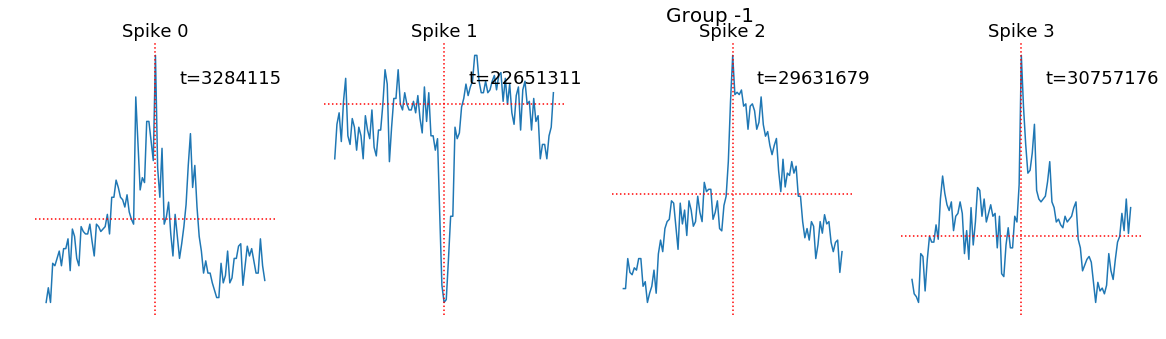

In [140]:
#print uncategory spike(gid=-1)
gid=-1
selectors = g==gid
#print(selectors)
#print(d)
spike_group_index=np.compress(selectors, d, axis=0)
#print(spike_group_index)
spike_group=np.compress(selectors, sd, axis=0)
#print(spike_group)
#print(spike_group[0,:])
plot_group_spike(spike_group, spike_group_index, 5, gid)

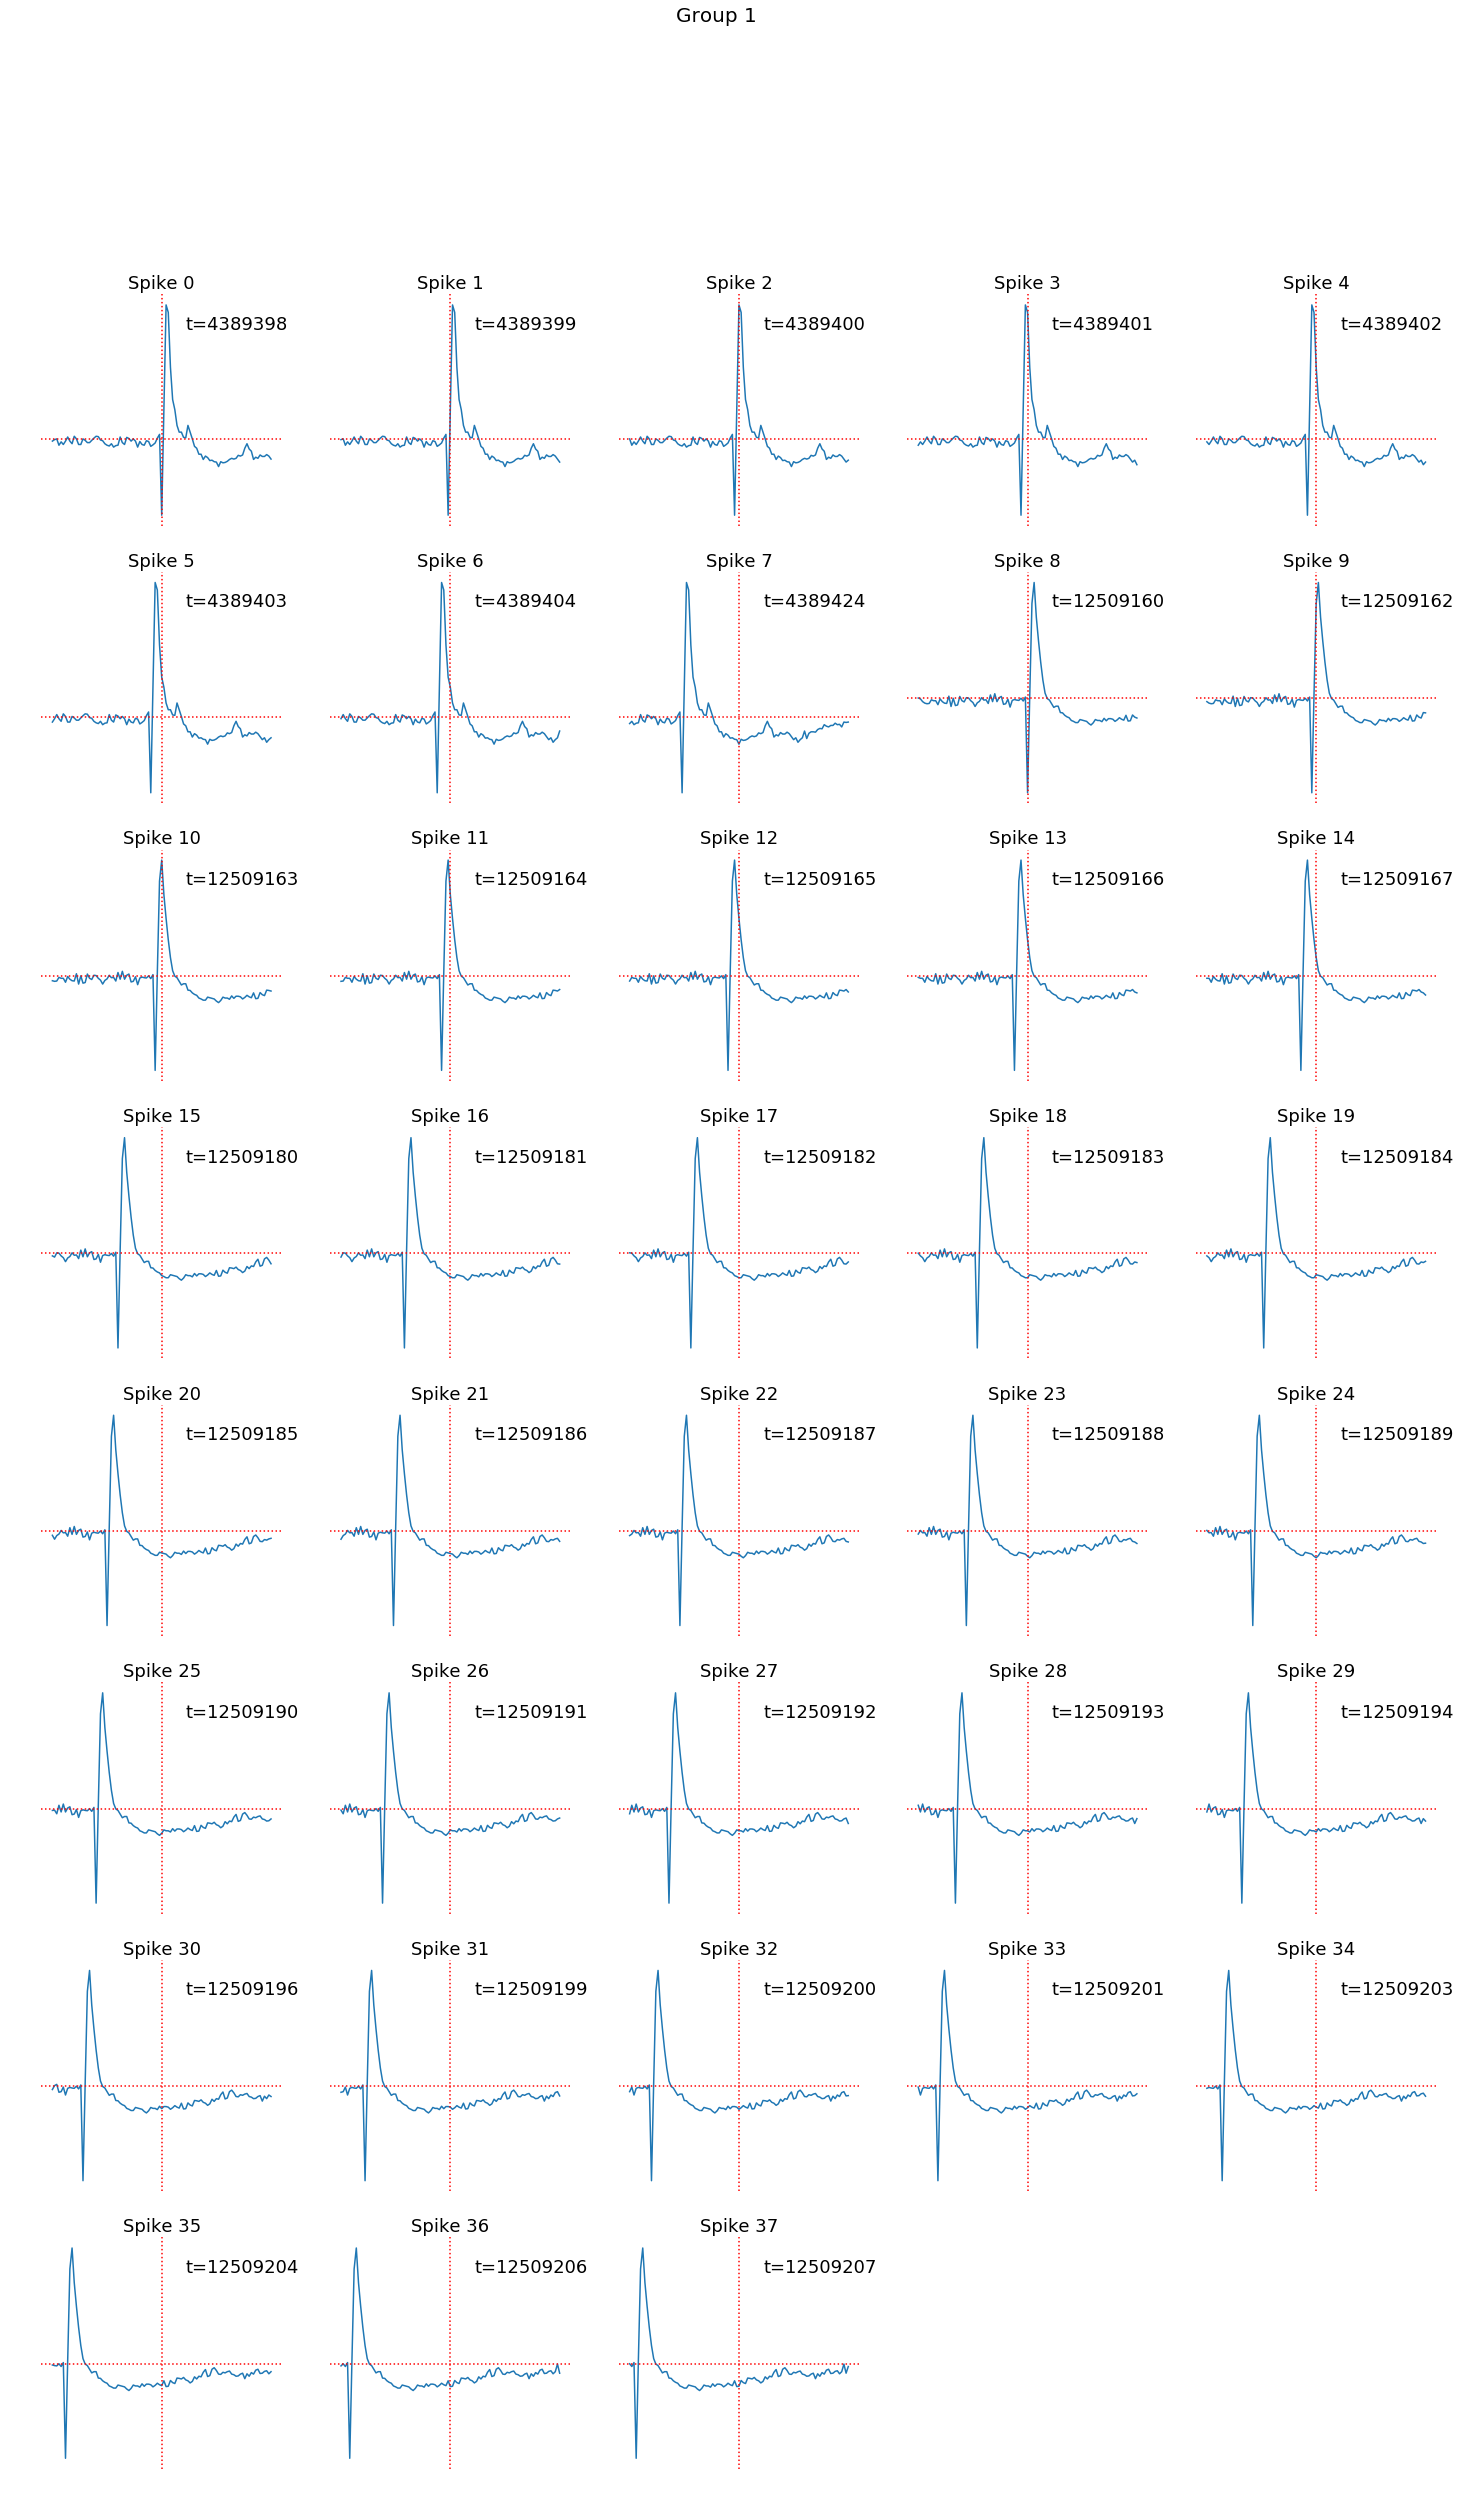

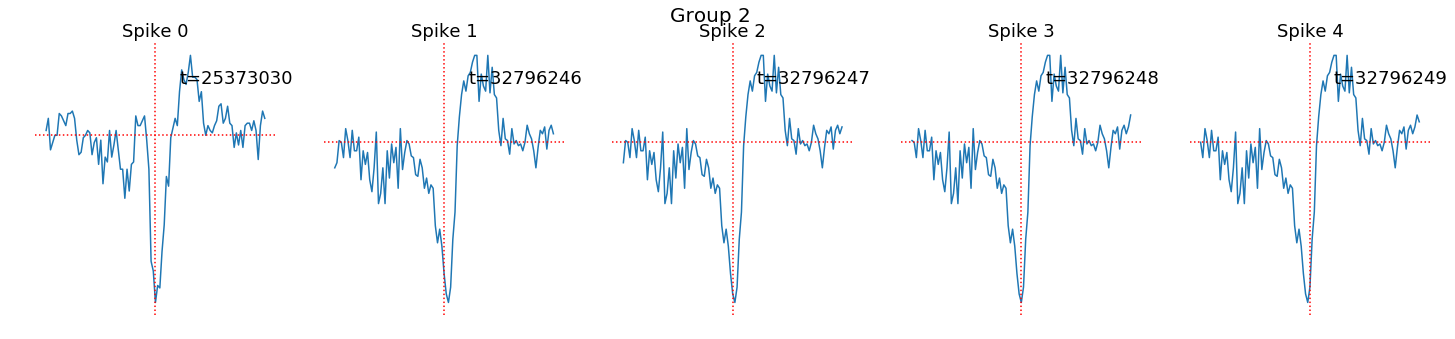

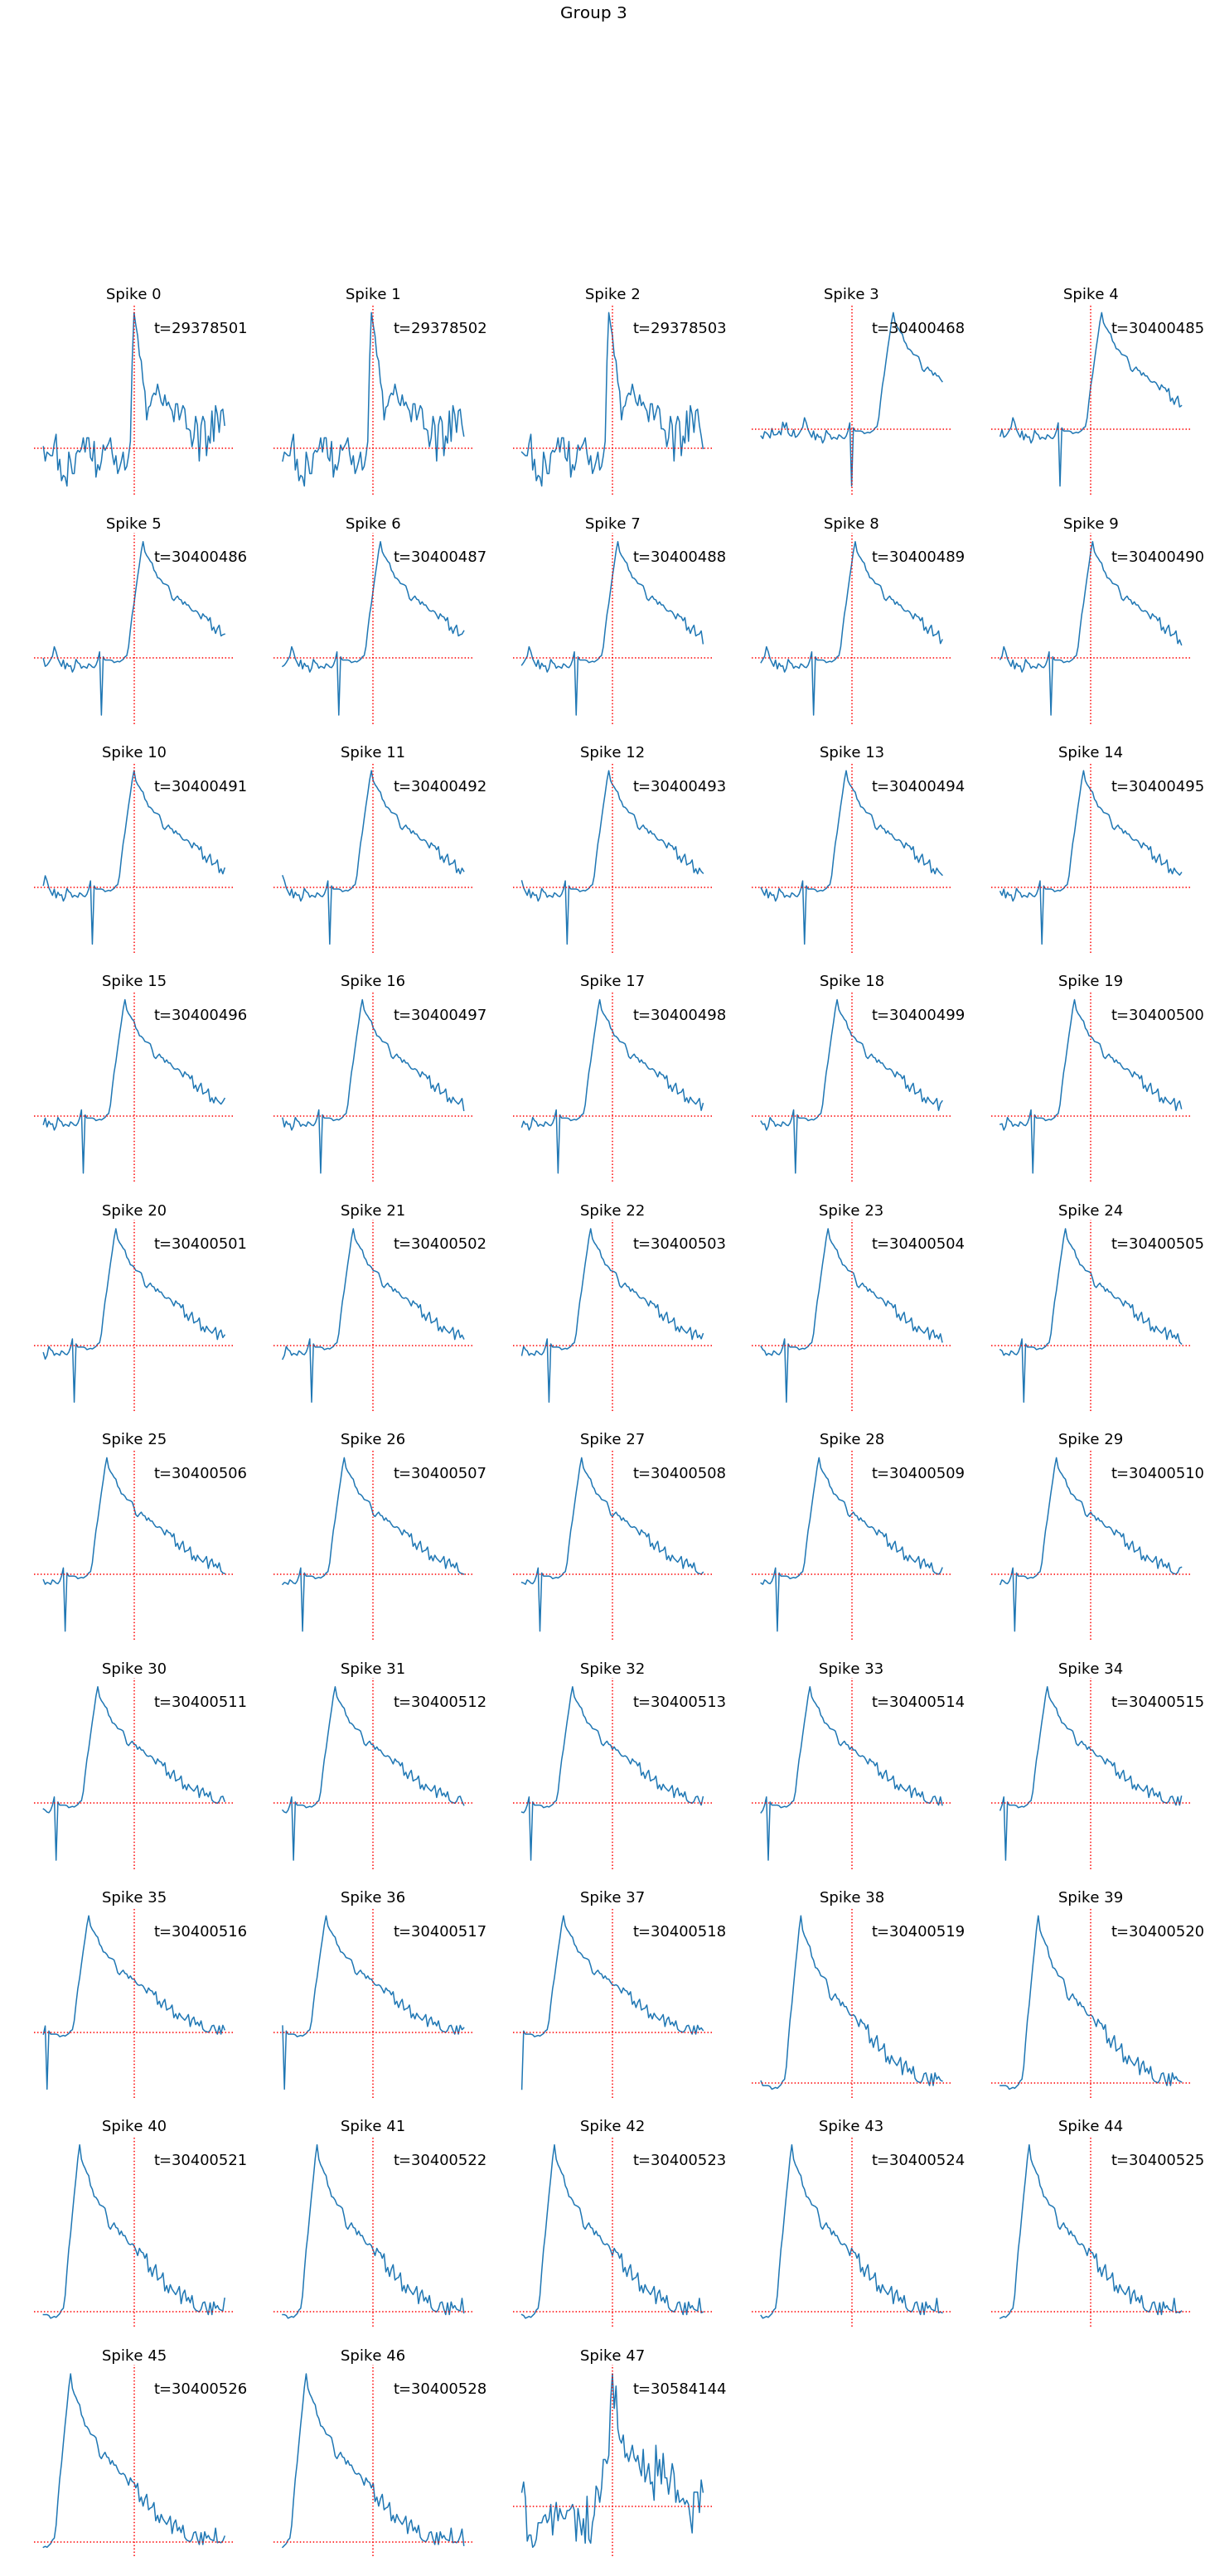

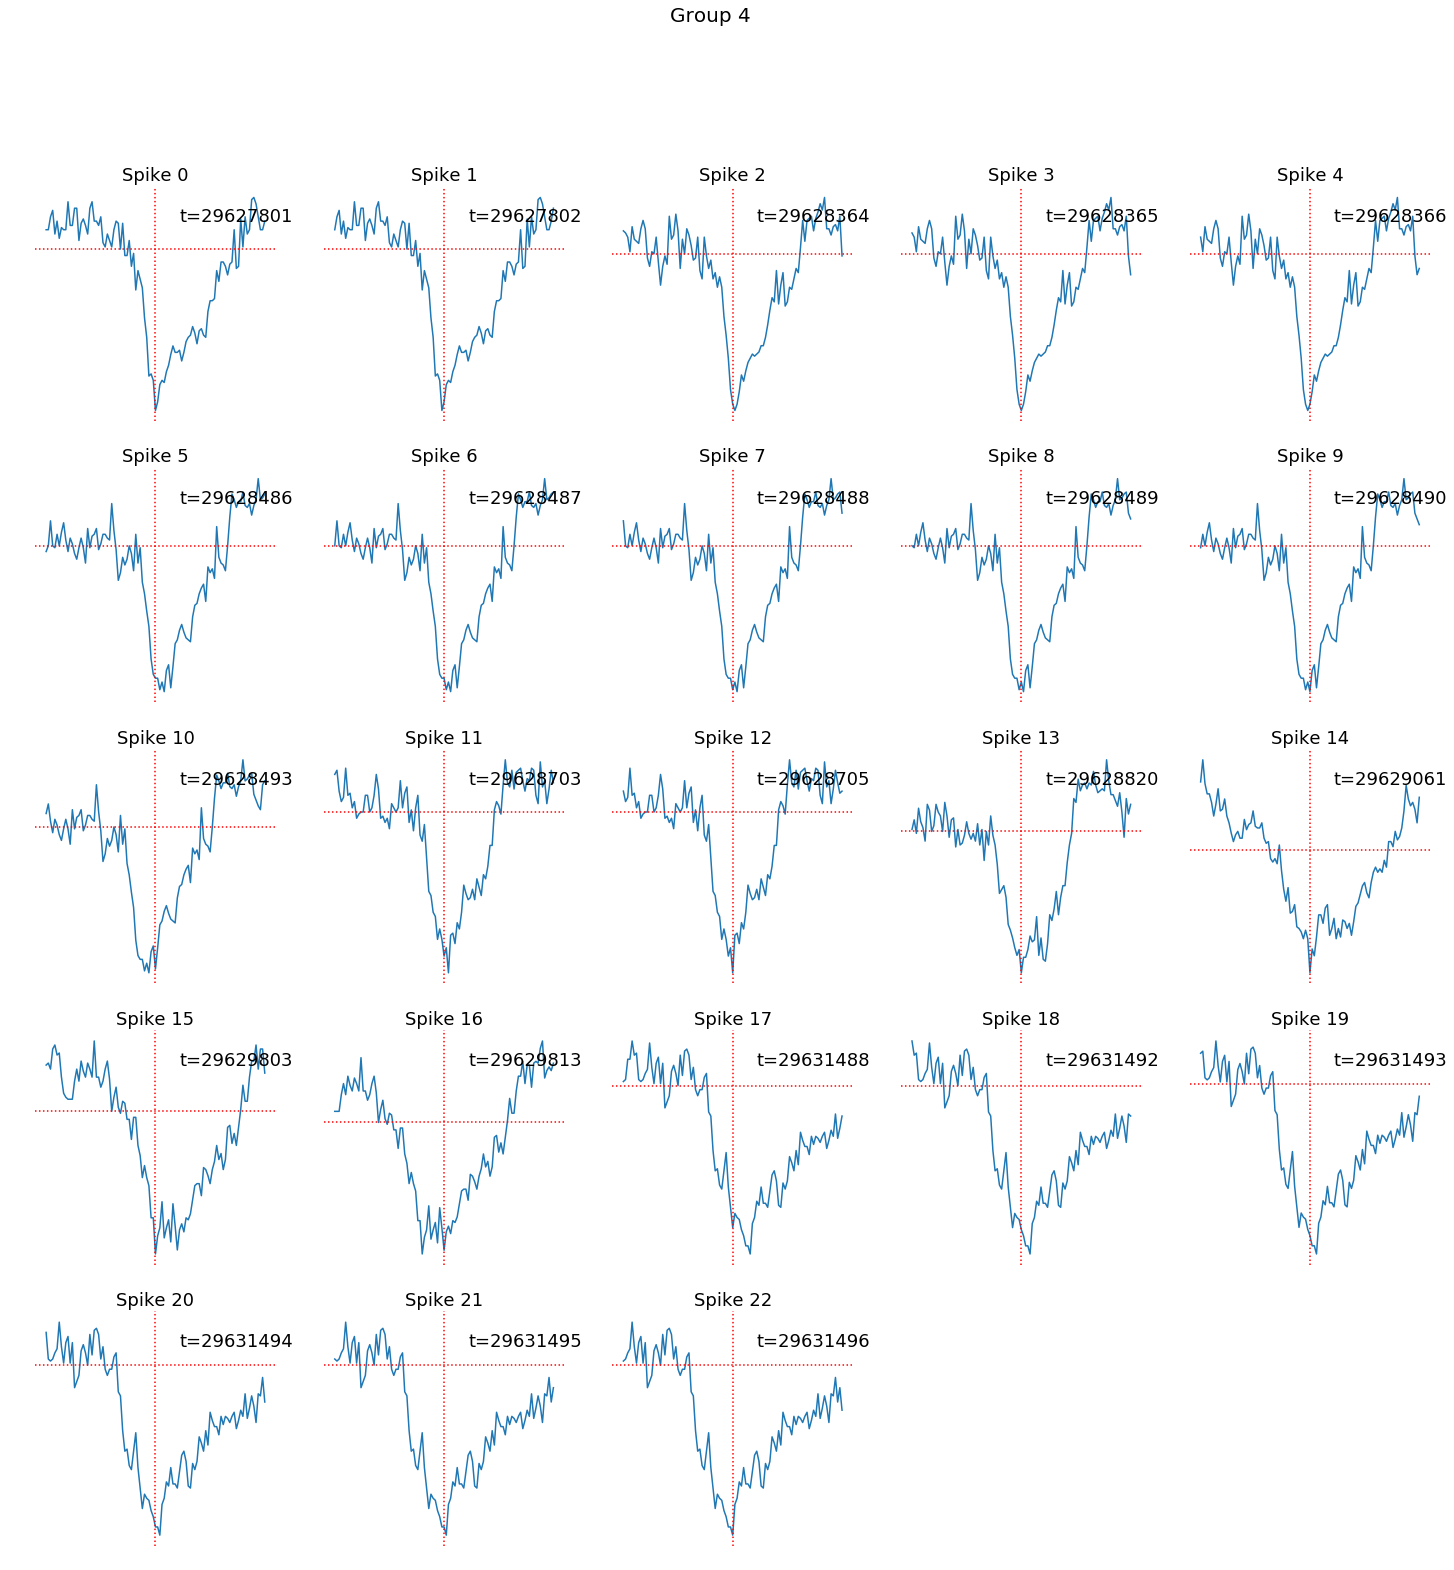

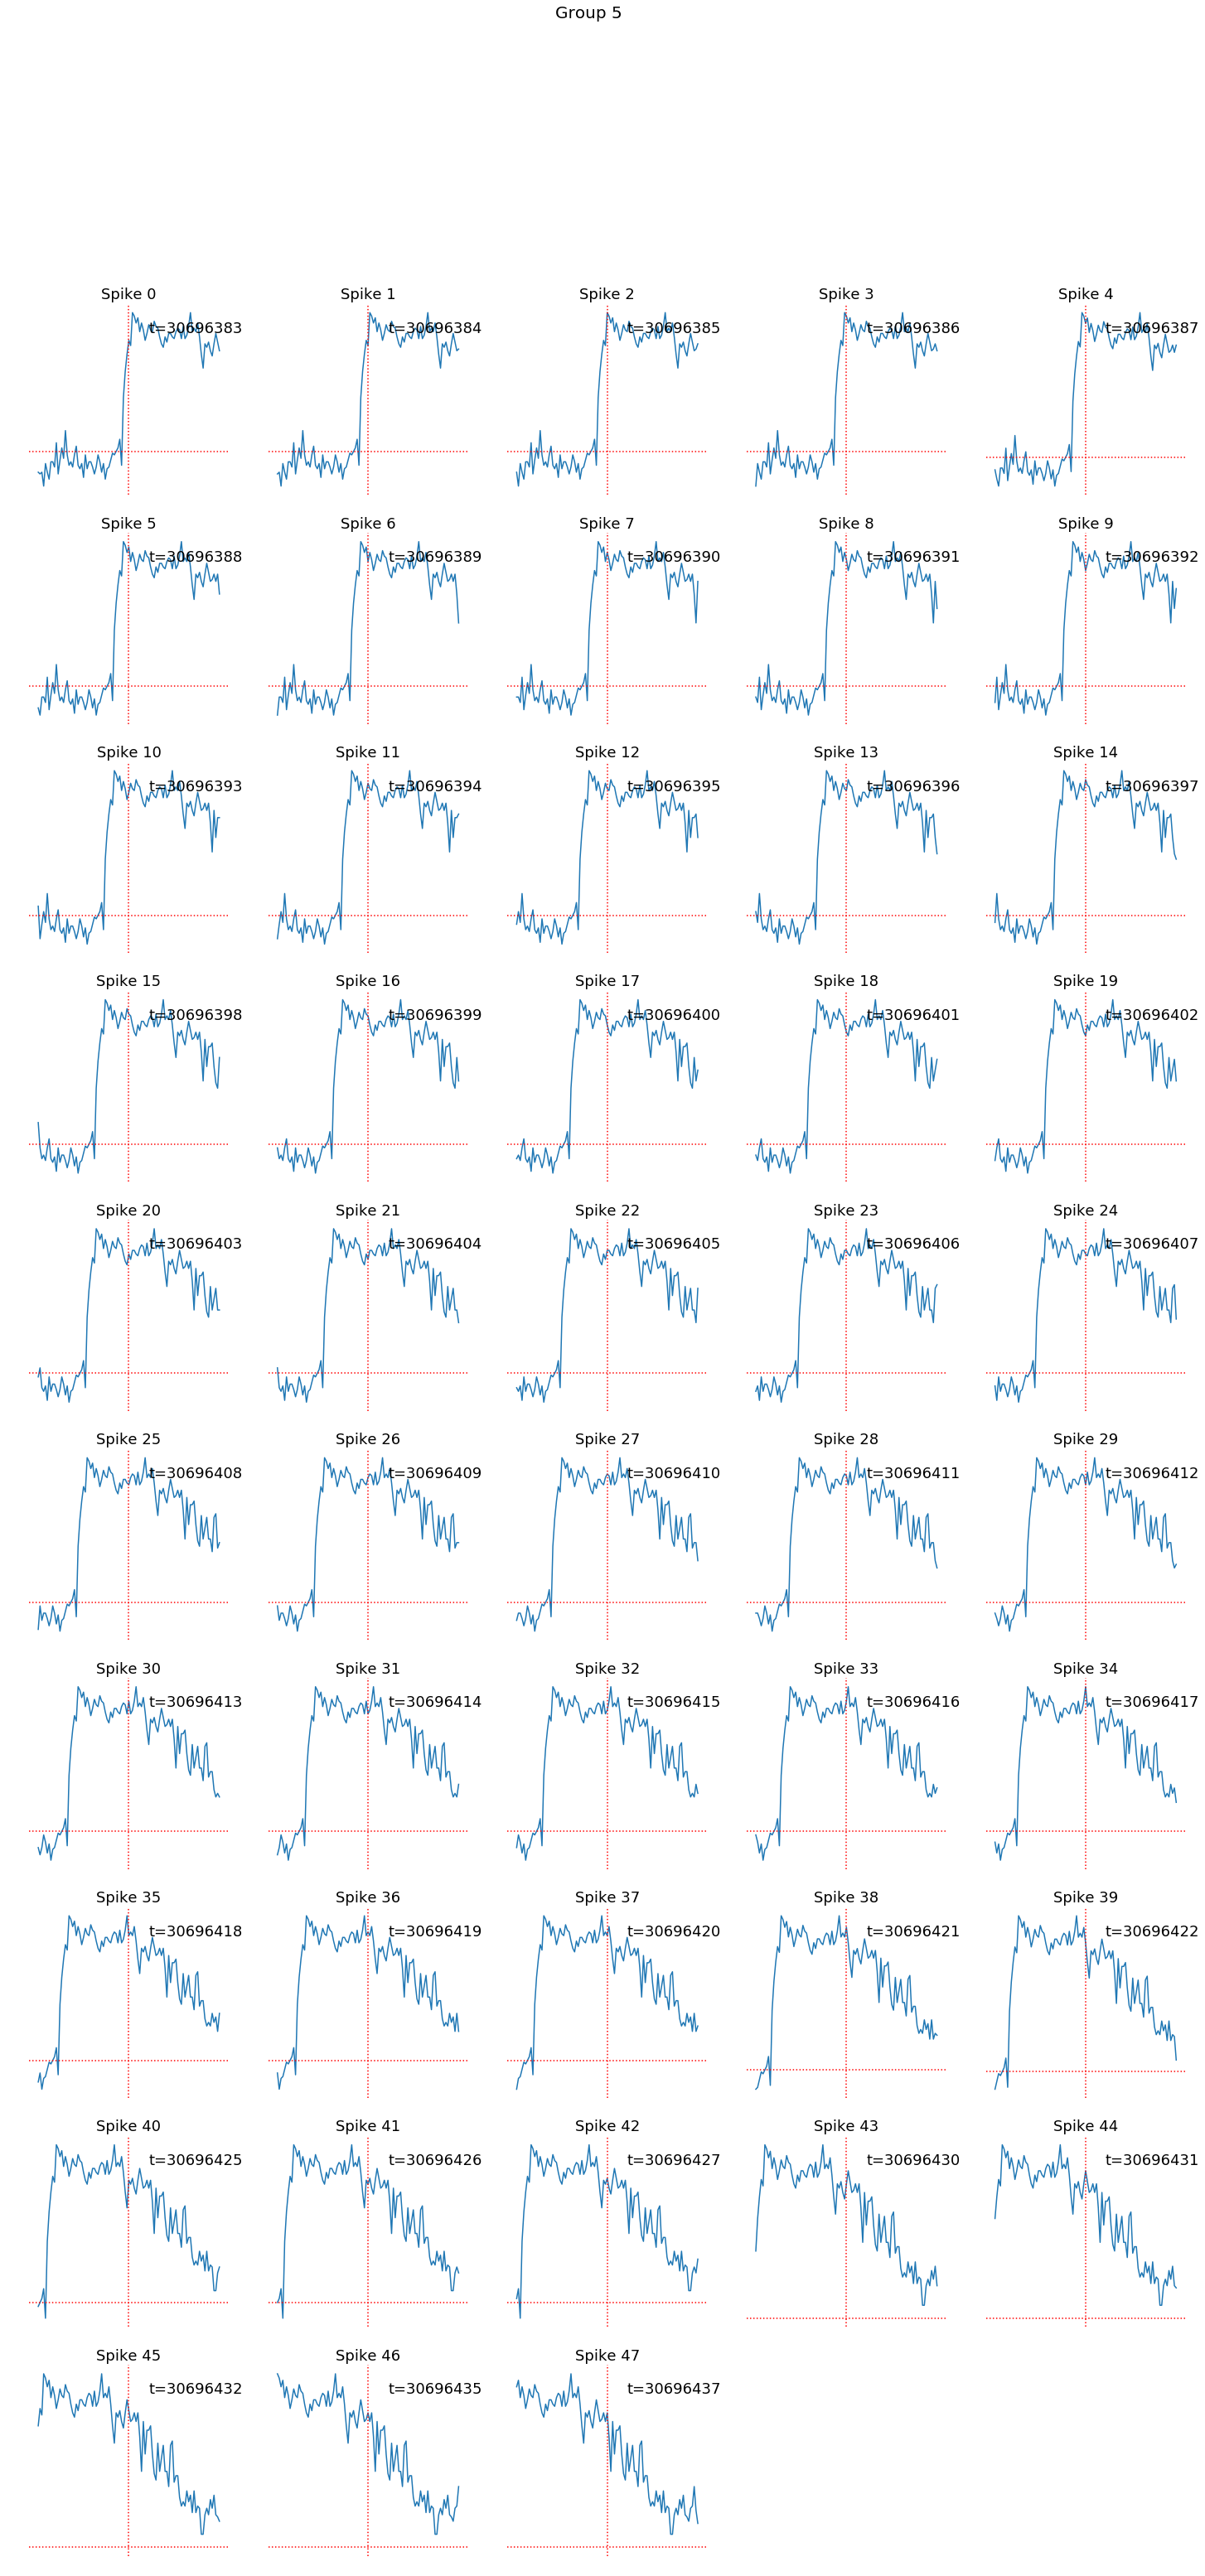

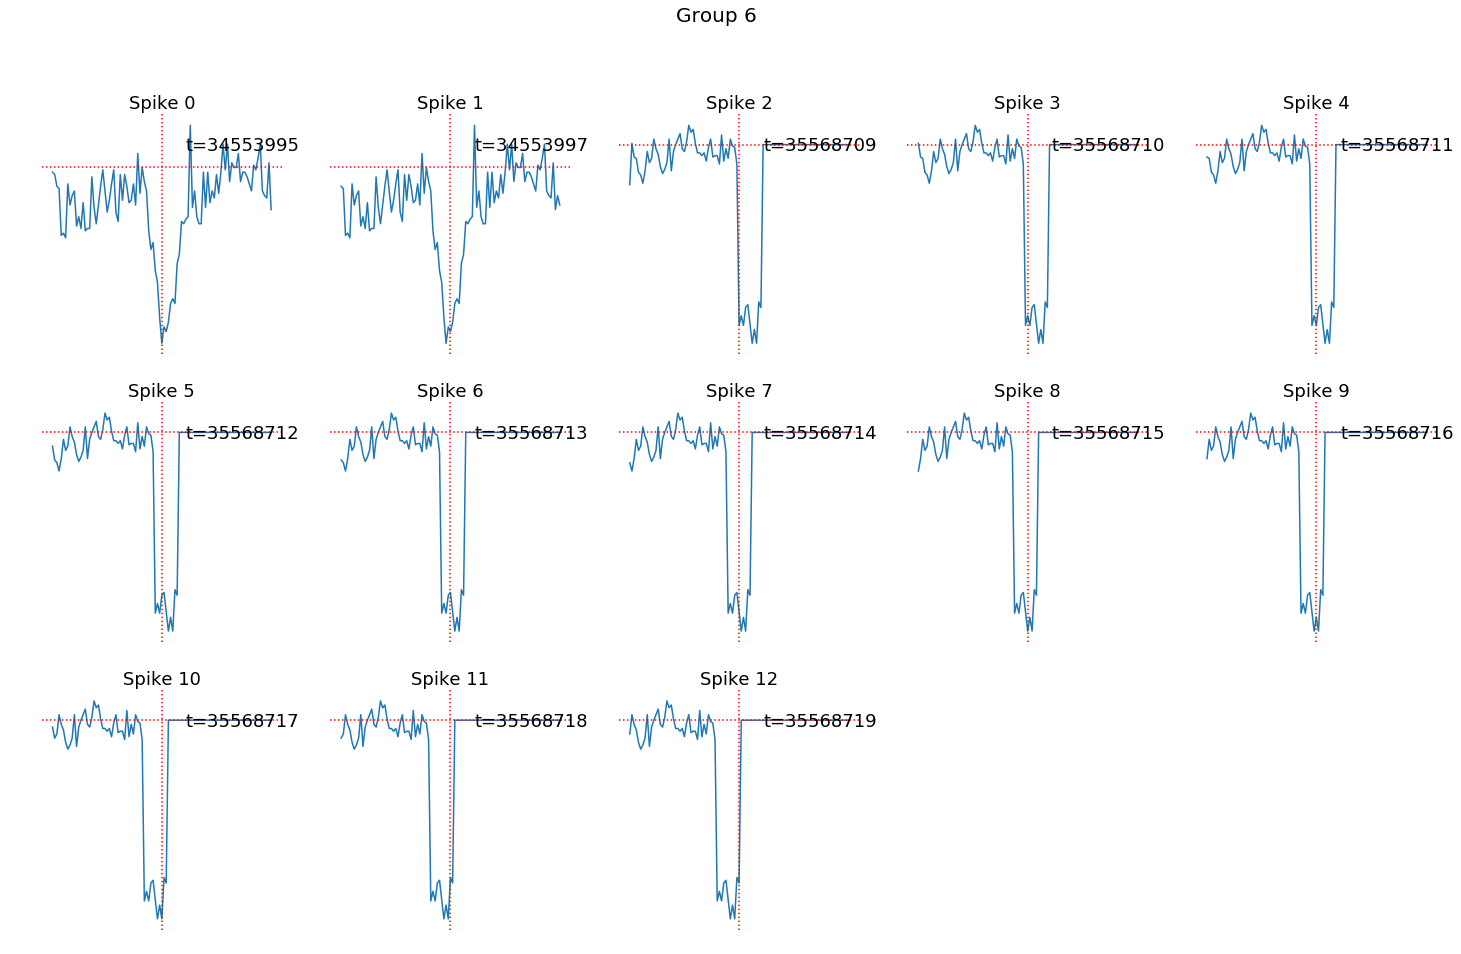

In [141]:
for gid in list(range(1,Spike_Group_Num+1)):
    selectors = g==gid
    spike_group_index=np.compress(selectors, d, axis=0)
    spike_group=np.compress(selectors, sd, axis=0)
    plot_group_spike(spike_group, spike_group_index, 5, gid)